I recorded my desktop mouse movements over 10 hours or so 
to get these pretty much useless data :)

In [6]:
#%matplotlib ipympl
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import gaussian_kde

DATA_PATH = "output.csv"

In [4]:
data = pd.read_csv(DATA_PATH, sep=',')
#data = data.replace(-999.0, np.NaN)
#data.columns = data.columns.str.strip()
data['time'] = pd.to_datetime(data['time'], unit='s', origin='unix')
data.set_index('time', inplace=True)
data

,mouse_x,mouse_y
time,,
2024-04-08 06:36:31.661999941,333,323
2024-04-08 06:36:32.664000034,365,310
2024-04-08 06:36:33.665999889,719,503
2024-04-08 06:36:34.667999983,848,810
2024-04-08 06:36:35.668999910,1007,690
...,...,...
2024-04-08 16:13:38.002000093,247,716
2024-04-08 16:13:39.003999949,534,648
2024-04-08 16:13:40.006000042,538,643


In [66]:
x = data['mouse_x']
y = data['mouse_y']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

Timedelta('0 days 09:37:10.348999977')

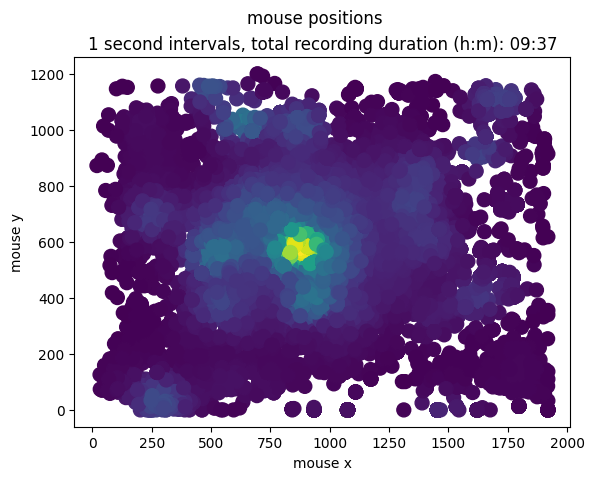

In [67]:
time_diff = data.index[-1] - data.index[0]
plt.scatter(x, y, c=z, s=100)
plt.xlabel("mouse x")
plt.ylabel("mouse y")
plt.suptitle("mouse positions")
plt.title("1 second intervals, total recording duration (h:m): %s" % (pd.to_datetime('2262-04-11') + time_diff).strftime('%H:%M'))
time_diff

In [37]:
diff = data.diff()

f = data[(diff['mouse_x'] != 0) & (diff['mouse_y'] != 0)]
static_points = data[(diff['mouse_x'] == 0) & (diff['mouse_y'] == 0)]

In [39]:
x = f['mouse_x']
y = f['mouse_y']

xstatic = static_points['mouse_x']
ystatic = static_points['mouse_y']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

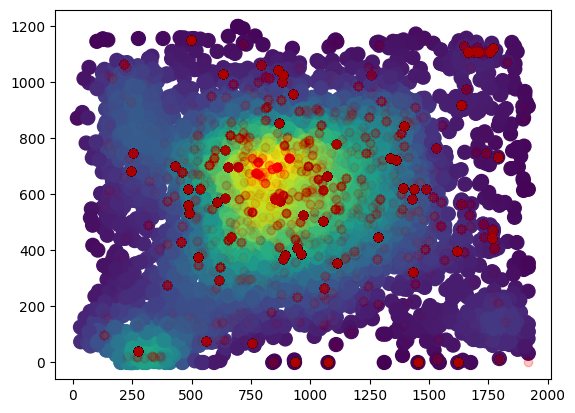

In [45]:
plt.scatter(x, y, c=z, s=100)
plt.scatter(xstatic, ystatic, color="red", alpha=0.01)

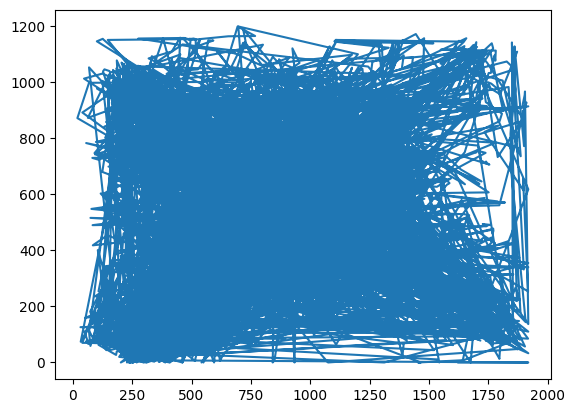

In [36]:
plt.plot(x, y)